In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fruitsml1/sample_submission.csv
/kaggle/input/fruitsml1/fruits_test.csv
/kaggle/input/fruitsml1/fruits_train.csv
/kaggle/input/classify-fruits-fall-2024-25-b-1/sample_submission.csv
/kaggle/input/classify-fruits-fall-2024-25-b-1/fruits_test.csv
/kaggle/input/classify-fruits-fall-2024-25-b-1/fruits_train.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
dataset = pd.read_csv("/kaggle/input/fruitsml1/fruits_train.csv")
dataset.head(10)

,Id,mass,width,height,label
0,1,160,7.1,7.6,2
1,2,194,7.2,10.3,3
2,3,154,7.2,7.2,2
3,4,154,7.0,7.1,1
4,5,162,7.4,7.2,1
5,6,164,7.2,7.0,2
6,7,154,7.1,7.5,2
7,8,116,6.1,8.5,3
8,9,170,7.6,7.9,1
9,10,116,5.9,8.1,3


In [4]:
test = pd.read_csv("/kaggle/input/fruitsml1/fruits_test.csv")
test.head(10)

,Id,mass,width,height
0,1,118,6.1,8.1
1,2,158,7.2,7.8
2,3,120,6.0,8.4
3,4,210,7.8,8.0
4,5,156,7.6,7.5
5,6,176,7.4,7.2
6,7,154,7.3,7.3
7,8,196,7.3,9.7
8,9,130,6.0,8.2
9,10,150,7.1,7.9


In [5]:
output = pd.read_csv("/kaggle/input/fruitsml1/sample_submission.csv")
output.head(10)

,ID,Category
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
5,6,1
6,7,1
7,8,1
8,9,1
9,10,1


In [6]:
x_train = dataset.drop(['label', 'Id'], axis = 1)
y_train = dataset['label']

In [7]:
x_test = test.drop('Id', axis = 1)
y_test = output['Category']

Text(0, 0.5, 'Accuracy')

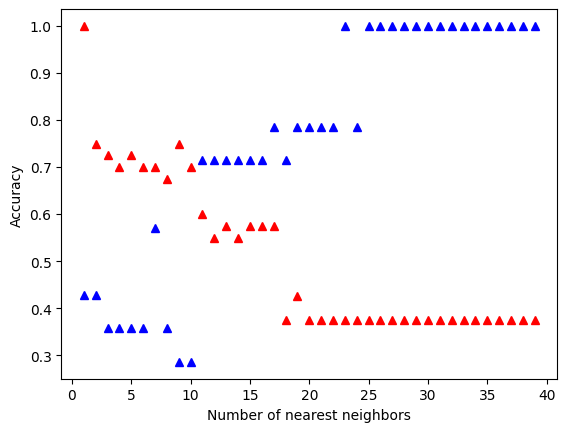

In [8]:
for i in range (1, 40):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(x_train, y_train)
    y_pred1 = knn.predict(x_train)
    y_pred2 = knn.predict(x_test)
    acc1 = accuracy_score(y_train, y_pred1)
    acc2 = accuracy_score(y_test, y_pred2)
    plt.plot(i, acc1, 'r^')
    plt.plot(i, acc2, 'b^')
plt.xlabel('Number of nearest neighbors')
plt.ylabel('Accuracy')

In [9]:
knn = KNeighborsClassifier(n_neighbors= 11)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [10]:
y_pred1 = knn.predict(x_train)
acc = accuracy_score(y_pred1, y_train)
print(f"Training Accuracy: {acc:.3f}")

Training Accuracy: 0.600


In [11]:
y_pred2 = knn.predict(x_test)
acc = accuracy_score(y_pred2, y_test)
print(f"Testing Accuracy: {acc:.3f}")

Testing Accuracy: 0.714


In [12]:
cm = confusion_matrix(y_test, y_pred2)
print(cm)

[[10  1  3]
 [ 0  0  0]
 [ 0  0  0]]


In [13]:
knn.score(x_test, y_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred2))


Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.71      0.83        14
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.71        14
   macro avg       0.33      0.24      0.28        14
weighted avg       1.00      0.71      0.83        14



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0, 0.5, 'Accuracy')

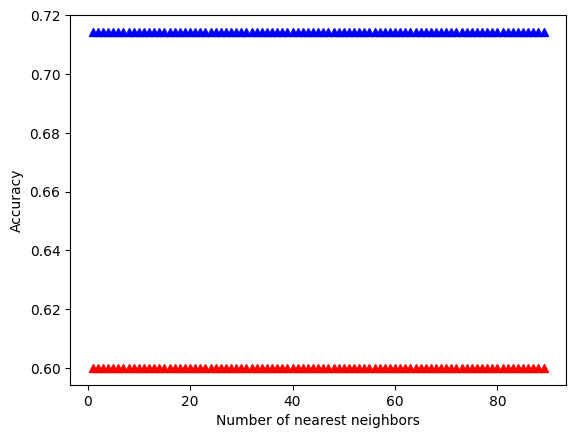

In [14]:
for i in range (1, 90):
    rfc = RandomForestClassifier(n_estimators = i, random_state = 45)
    rfc.fit(x_train, y_train)
    y_pred1 = knn.predict(x_train)
    y_pred2 = knn.predict(x_test)
    acc1 = accuracy_score(y_train, y_pred1)
    acc2 = accuracy_score(y_test, y_pred2)
    plt.plot(i, acc1, 'r^')
    plt.plot(i, acc2, 'b^')
plt.xlabel('Number of nearest neighbors')
plt.ylabel('Accuracy')

In [15]:
rfc = RandomForestClassifier(n_estimators = i, random_state = 45)
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=89, random_state=45)

In [16]:
y_pred1 = knn.predict(x_train)
acc = accuracy_score(y_pred1, y_train)
print(f"Training Accuracy: {acc:.3f}")

Training Accuracy: 0.600


In [17]:
y_pred2 = rfc.predict(x_test)
acc = accuracy_score(y_pred2, y_test)
print(f"Testing Accuracy: {acc:.3f}")

Testing Accuracy: 0.500


In [18]:
cm = confusion_matrix(y_test, y_pred2)
print(cm)

[[7 2 5]
 [0 0 0]
 [0 0 0]]


In [19]:
rfc.score(x_test, y_test)

0.5

In [20]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred2))


Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.50      0.67        14
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.50        14
   macro avg       0.33      0.17      0.22        14
weighted avg       1.00      0.50      0.67        14



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
output = pd.DataFrame({'ID': test.Id, 'Category': y_pred2})
output.to_csv('submission.csv', index=False)